# Life Expectancy vs. GDP
*This project was part of the [codecademy](http://codecademy.com) Career Path for Data Scientist: Machine Learning Specialist.*

## Goal
The gross domestic product (GDP) as a monetary measure of the market value of all goods and services produces in a country during a specific time period ([1](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm)) is often considered as an indicator of life expectancy ([2](https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita)).

Based on the available data we want to answer the following questions:
1. How does the GDP develops over time for the investigated countries?
2. How did the life expectancy change in the same time period?
3. Is there a relationship between those two variables?

## Data

The data was provided by codecademy. The features are:
* Country
* Year
* Life expectancy at birth in years (LE)
* GDP in dollars

## EDA and Data Visualization

In [117]:
#import all Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.set_color_codes()

In [127]:
#Load data and get a first impression
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [4]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


### Describing the DataFrame

From a first glance we can see that we got the life expectancy (LE) and the GDP for different countries in different years. We do have 6 unique entries in the Country column, so we do have the LE and GDP from 2000 to 2015 for 6 different countries.

The mean LE is 72.8 years with a standard deviation of 10.6 years. The mean GDP for all is 3.88 * trillion dollar.

Let's see which countries are represented in the dataset.

In [5]:
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

### Summary Statistics

So far we do know the mean values for the whole dataset. Let's have a look at the mean values over the time frame of 15 years for each country individually.

In [6]:
df.groupby(by=['Country']).mean()

,Year,Life expectancy at birth (years),GDP
Country,,,
Chile,2007.5,78.94375,1.697888e+11
China,2007.5,74.26250,4.957714e+12
Germany,2007.5,79.65625,3.094776e+12
Mexico,2007.5,75.71875,9.766506e+11
United States of America,2007.5,78.06250,1.407500e+13
Zimbabwe,2007.5,50.09375,9.062580e+09


If we recall the mean values from before, we can see that regarding the life expectancy Chile, China, Germany, Mexico and the USA are all above the mean. However, regarding the GDP only China and the USA are above it. Even germany is slightly below the overall GDP mean.

What strikes the eye here is that Zimbabwe is far behind the other represented countries. This has a strong influence on the mean value for LE.

### Plotting the data

First we are going to have a look at the development of LE and GDP over time.

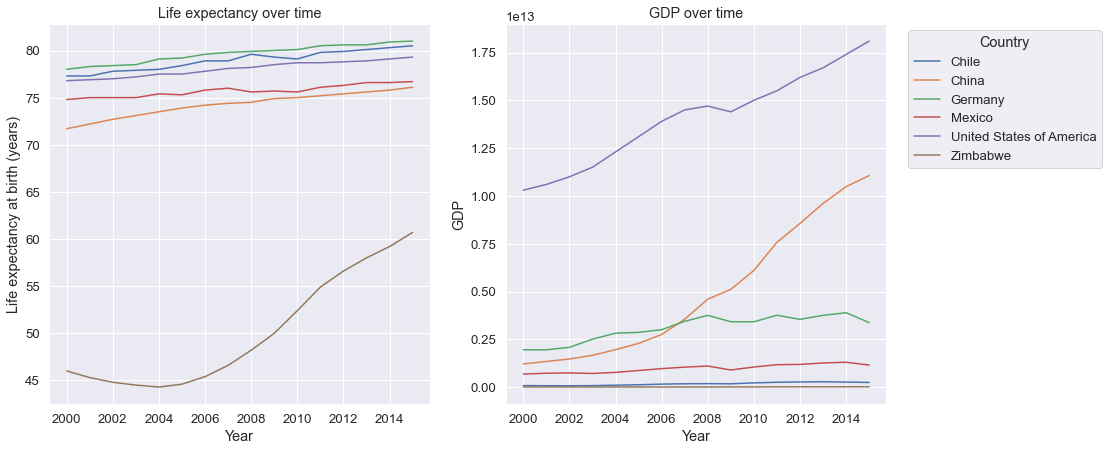

In [126]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(15,7))
axs[0].set_title('Life expectancy over time')
axs[1].set_title('GDP over time')

#Life expectancy vs Year
sns.lineplot(ax=axs[0], data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
#hiding the legend from the first subplot
axs[0].legend([],[], frameon=False)
#GDP vs. Year
sns.lineplot(ax=axs[1], data=df, x='Year', y='GDP', hue='Country')
#placing the legend outside of the box next to both subplots
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", title='Country')

plt.show()

We can see some interesting developments over time in those two plots. I guess the first one to recognize is Zimbabwe with its relatively low life expectancy. We can see that at around 2005/2006 the LE increased dramatically from a minimum of around 45 to 60 years. However, it looks like the GDP did not much increase in the same course. This might be misleading, since we do have big differences in the GDP and the y-axis scaling might create this probably false perception. We are going to look more into that in a second.

For all the other countries we can see a slow and steady increase in life expectancy. We can also see that especially the USA and China had a huge increase in their GDP from 2000 to 1015.

So before we look at the relationship betweens those two variables, we are going to have a closer look at Zimbabwes GDP.

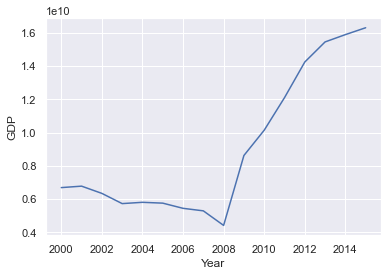

In [8]:
sns.lineplot(data=df[df['Country']=='Zimbabwe'], x='Year', y='GDP' )
plt.show()

As we can see the y-axis in the first plot was very misleading. We do can see an high increase in Zimbabwes GDP starting at 2008.

To make the growth of the GDP for each country better comparable, we are going to calculate the annually difference in percentage and plot it.

In [9]:
df['growth'] = df.groupby(['Country']).GDP.pct_change()*100

In [10]:
df.head(20)

,Country,Year,Life expectancy at birth (years),GDP,growth
0,Chile,2000,77.3,7.786093e+10,NaN
1,Chile,2001,77.3,7.097992e+10,-8.837562
2,Chile,2002,77.8,6.973681e+10,-1.751358
3,Chile,2003,77.9,7.564346e+10,8.469915
4,Chile,2004,78.0,9.921039e+10,31.155282
5,Chile,2005,78.4,1.229650e+11,23.943668
6,Chile,2006,78.9,1.547880e+11,25.879722
7,Chile,2007,78.9,1.736060e+11,12.157273
8,Chile,2008,79.6,1.796380e+11,3.474534
9,Chile,2009,79.3,1.723890e+11,-4.035338


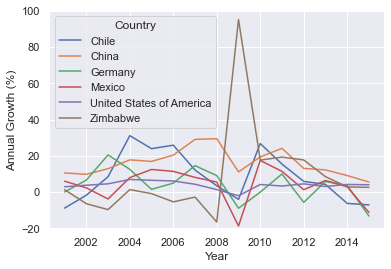

In [16]:
sns.lineplot(data=df, x='Year', y='growth', hue='Country')
plt.ylim(-20, 100)
plt.ylabel("Annual Growth (%)")
plt.show()

We can see that the annual growth for all countries is in the range between -20 und 20%. Except for Zimbabwe at 2009, with an growth of about 100%, which means that they doubled their GDP in that year, as we have already discovered.

However, the changes for each year for each country is not really readable here. Let's try another visualization for that.

In [76]:
def show_growth_per_country(ax, df, country):
    data_per_country = df[df['Country'] == country][1:]

    color = (data_per_country['growth'] > 0).map({True : 'g',
                                False : 'r'})

    plt.sca(ax)
    ax.set_title(country, fontsize=16)
    sns.barplot(data=data_per_country, x='Year', y='growth', palette = color)
    plt.xticks(rotation=90)
    plt.ylabel("Annual Growth (%)")

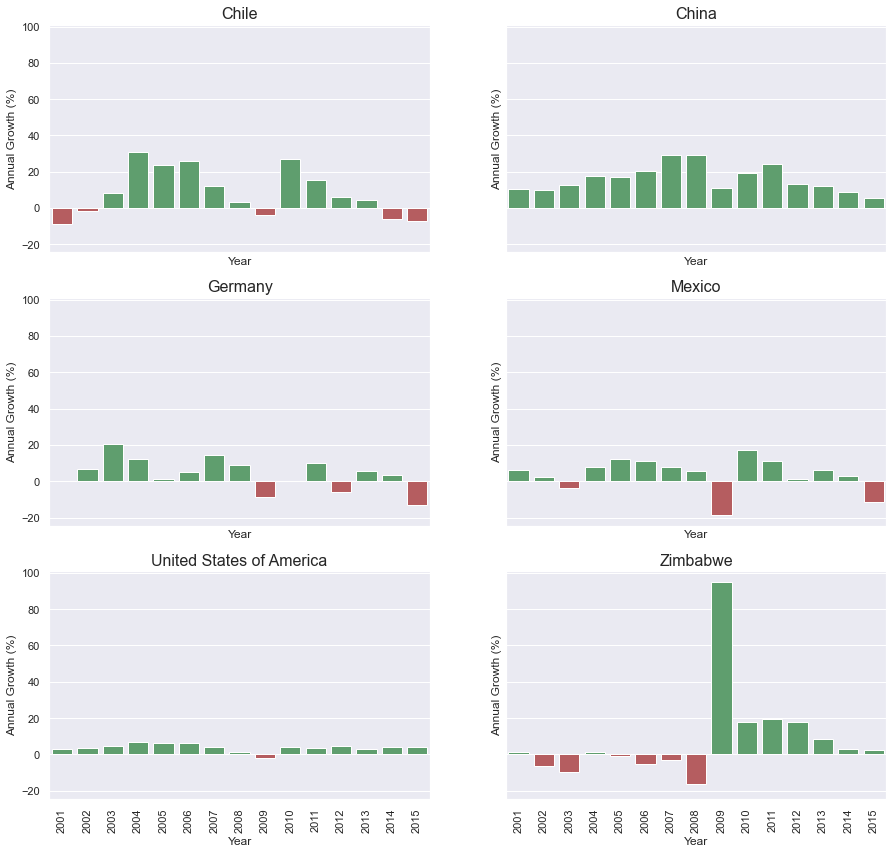

In [114]:
countries = df['Country'].unique().tolist()
fig, axs = plt.subplots(3,2 , figsize=(15,10), sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.2, wspace=None, hspace=None)

nr_country = 0
for i in range(3):
    for j in range(2):
        show_growth_per_country(axs[i][j], df, countries[nr_country])
        nr_country += 1

## GDP vs. Life Expectancy

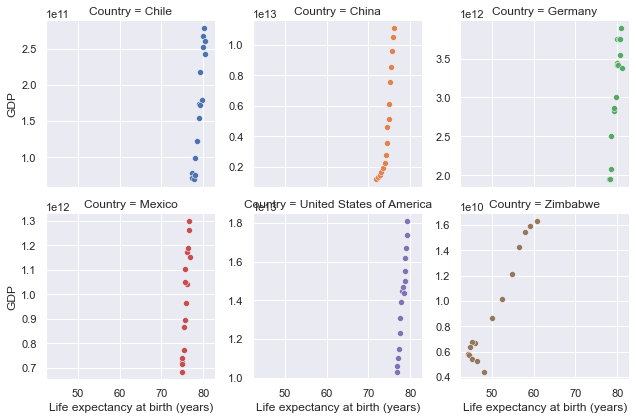

In [88]:
g = sns.FacetGrid(df, col='Country', sharey=False, col_wrap=3, hue='Country')
g.map(sns.scatterplot, "Life expectancy at birth (years)", 'GDP')
plt.show()

We can clearly see that the life expectancy is increasing with an increasing GDP, showing a strong positive linear relationship. To back up this visual investigation, lastly we are going to calculate the pearson correlation for each country.

In [137]:
#since the pandas corr() function calculates the correlation between all columns, this line of code get's too messy
#df.groupby(['Country']).corr()

#save results in a dict with country as key and the pearsonr() result as value
pearson_results = {}

from scipy.stats import pearsonr
for c in countries:
    data_for_country = df[df['Country'] == c]
    pearson_results[c] = pearsonr(data_for_country['Life expectancy at birth (years)'], data_for_country['GDP'])

#print the correlation coefficients for each country
for key, value in pearson_results.items():
    print (key + ": \t" + str(value[0]))


Chile: 	0.9498766659254412
China: 	0.9085255408648357
Germany: 	0.932698898256127
Mexico: 	0.932237716784708
United States of America: 	0.9817092382430257
Zimbabwe: 	0.9661998955858778


The results from the pearson correlation strongly support our visual results. We do have a very very strong and positive correlation between both variables for each of the investigated countries.

## Discussion

We did investigate the life expectancy and GDP for 6 different countries over a time period of 15 years. We did see for most of those countries a steady increase of both variables over time. We did also see a rapid change of Zimbabwe's GDP in 2009, resulting also in a rapid growth of life expectancy in the following years. The investigation of both variables on their own as well as plotting their relationship and calculating their correlation coefficient did prove that there is a strong relationship between them.

However, we should keep in mind that the total GDP may not the best variable to compare different countries. For a further analysis the population should be gathered and GDP per capita should be calculated. This would result in numeric values that could be compared between different countries on the same scale, as for example shown [here](https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita). Also this value should be corrected for inflation and cross-country price differences.

Also when we are looking at life expectancies we should keep in mind that this is an average value. Therefore it does not necessary mean that people are actually getting older. It often means that less children are dying due to poverty. Life expectancy at birth is therefore also part of the Sustainable Development goals ([3](https://dashboards.sdgindex.org/map/indicators/life-expectancy-at-birth)).

Furthermore, it has been highly discussed if this relationship is actually as described. There has been evidence that rising incomes and personal well-being could actually lead to the opposite effect ([4](https://www.weforum.org/agenda/2016/10/the-relationship-between-gdp-and-life-expectancy-isnt-as-simple-as-you-might-think)).
